## From Noise to Notes: A Diffusion-Based Cleanup

### Importing the libraries

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### adding salt & pepper noise to the image

In [ ]:
def add_salt_and_pepper_noise(image: np.ndarray,
                              amount: float = 0.2,
                              salt_vs_pepper: float = 0.5) -> np.ndarray:
    """
    Adds salt-and-pepper noise to an image.
    
    Parameters:
      image           : H×W×C uint8 image array (0–255)
      amount          : fraction of pixels to corrupt (e.g. 0.2 for 20%)
      salt_vs_pepper  : fraction of salt vs pepper noise (0.5 means 50% salt, 50% pepper)
    
    Returns:
      noisy_image : same shape as input, with noise applied
    """
    noisy = image.copy()
    h, w, c = noisy.shape
    num_pixels = int(amount * h * w)
    
    # Salt (white) noise
    num_salt   = int(salt_vs_pepper * num_pixels)
    ys = np.random.randint(0, h, num_salt)
    xs = np.random.randint(0, w, num_salt)
    noisy[ys, xs] = 255  # white
    
    # Pepper (black) noise
    num_pepper = num_pixels - num_salt
    ys = np.random.randint(0, h, num_pepper)
    xs = np.random.randint(0, w, num_pepper)
    noisy[ys, xs] = 0    # black
    
    return noisy


# 1) Load
img = cv2.imread(r"C:\Users\Arian\Desktop\image1.jpg")           # BGR uint8
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)         # convert to RGB

# 2) Add high-intensity (50%) salt & pepper
noisy_img = add_salt_and_pepper_noise(img, amount=0.5, salt_vs_pepper=0.5)

# 3) Display
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Salt&Pepper (50)")
plt.imshow(noisy_img)
plt.axis("off")
plt.show()

# 4) save result
noisy_bgr = cv2.cvtColor(noisy_img, cv2.COLOR_RGB2BGR)
cv2.imwrite(r"C:\Users\Arian\Desktop\Original pictures\Compressed\img_01_sp20.png", noisy_bgr)

In [27]:
def denoise_image(image_path):
    noisy_image = cv2.imread(image_path)
    noisy_image_rgb = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)

    gaussian_denoised_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)
    gaussian_denoised_image_rgb = cv2.cvtColor(gaussian_denoised_image, cv2.COLOR_BGR2RGB)

    median_denoised_image = cv2.medianBlur(noisy_image, 5)
    median_denoised_image_rgb = cv2.cvtColor(median_denoised_image, cv2.COLOR_BGR2RGB)


    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.title('Original Noisy Image')
    plt.imshow(noisy_image_rgb)
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('Gaussian Blur Image')
    plt.imshow(gaussian_denoised_image_rgb)
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Median Blur Image')
    plt.imshow(median_denoised_image_rgb)
    plt.axis('off')

    plt.show()

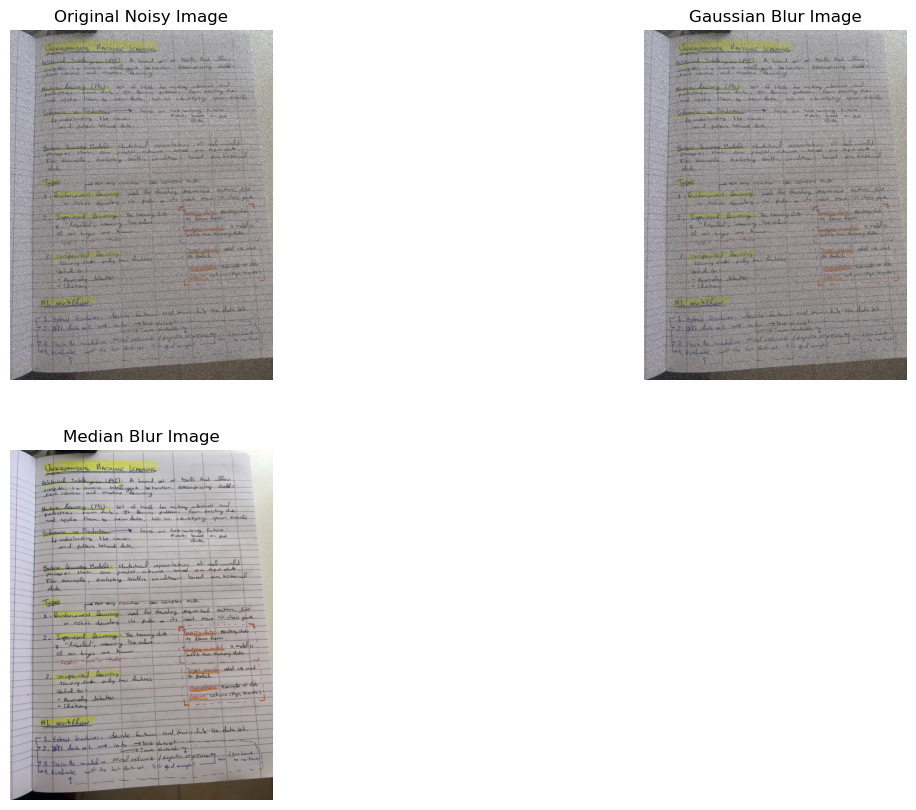

In [28]:
denoise_image(r"C:\Users\Arian\Desktop\Original pictures\Compressed\img_01_sp20.png")